# Hotspots
---
With the telecomunications data, I generate the heatmaps of the telecomunication activity in Milan and Trento and calculate the hotspots.

As it is not defined in the paper, I define the activity as:

$$ telecomunications = sms\_in + sms\_out + call\_in + call\_out + internet $$

To calculate the hotspots I use the formula given at the paper:

$$ I_i \geq \sum_{j=1}^{N}I_j + \Delta $$

Where $I_i$ is the telecomunications in the square $i$ and:

$$ \Delta = (MaxTraffic - \dfrac{1}{N} \cdot \sum_{j=1}^{N}I_j) \cdot P $$

Where $P$ is an arbitrary parameter. Although it is said in the paper that to get the 20 hotspots the got the value of $P$ should be 0.75, I didn't get 20 hotspots with this value of $P$. I got 0.6 and 0.11 for Milan and Trento, respectivelly. They are the same hotspots pointed by the paper

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Milan

In [2]:
columns = ['square_id',
           'time_interval',
           'country_code',
           'sms_in',
           'sms_out',
           'call_in',
           'call_out',
           'internet']
data = pd.read_csv('../data/telecommunications_mi/sms-call-internet-mi-2013-11-18.txt', 
                   sep='\t',
                   names=columns)
print(data.shape)
data.head()

(5417835, 8)


,square_id,time_interval,country_code,sms_in,sms_out,call_in,call_out,internet
0,1,1384729200000,0,NaN,NaN,NaN,0.005362,NaN
1,1,1384729200000,39,0.189487,0.036237,0.053438,0.026137,7.949597
2,1,1384729800000,39,0.106876,0.003575,NaN,0.029088,8.678360
3,1,1384729800000,40,NaN,NaN,NaN,NaN,0.053438
4,1,1384730400000,0,0.026137,NaN,NaN,NaN,NaN


In [3]:
sum_cols = ['sms_in', 'sms_out', 'call_in', 'call_out', 'internet']
group_data = data.groupby('square_id')[sum_cols].sum()
group_data['telecomunications'] = group_data[sum_cols].sum(axis=1)
group_data

,sms_in,sms_out,call_in,call_out,internet,telecomunications
square_id,,,,,,
1,91.991272,48.432897,64.897314,69.510802,1409.177957,1684.010242
2,93.284573,49.030664,65.832918,70.610051,1414.966873,1693.725079
3,94.661240,49.666963,66.828833,71.780159,1421.128945,1704.066139
4,88.245204,46.701456,62.187317,66.326806,1392.410257,1655.871040
5,82.068293,43.269214,58.078799,62.089841,1273.064486,1518.570633
...,...,...,...,...,...,...
9996,352.929729,162.319192,243.759867,269.662387,5492.252374,6520.923548
9997,370.317380,170.573958,250.279016,279.195303,5776.997806,6847.363462
9998,366.408092,168.499378,248.533853,276.876431,5728.633641,6788.951395


In [4]:
final_telco = group_data['telecomunications']
final_telco.head()

square_id
1    1684.010242
2    1693.725079
3    1704.066139
4    1655.871040
5    1518.570633
Name: telecomunications, dtype: float64

In [5]:
for day in range(19, 25):
    data = pd.read_csv(f'../data/telecommunications_mi/sms-call-internet-mi-2013-11-{day}.txt', 
                       sep='\t',
                       names=columns)
    group_data = data.groupby('square_id')[sum_cols].sum()
    group_data['telecomunications'] = group_data[sum_cols].sum(axis=1)
    final_telco += group_data['telecomunications']

In [6]:
final_telco = final_telco.reset_index()
final_telco.head()

,square_id,telecomunications
0,1,12385.196028
1,2,12457.063639
2,3,12533.563868
3,4,12177.030197
4,5,11151.243639


In [7]:
final_telco['square_x'] = (final_telco.square_id - 1) % 100
final_telco['square_y'] = (final_telco.square_id - 1) // 100
final_telco

,square_id,telecomunications,square_x,square_y
0,1,12385.196028,0,0
1,2,12457.063639,1,0
2,3,12533.563868,2,0
3,4,12177.030197,3,0
4,5,11151.243639,4,0
...,...,...,...,...
9995,9996,46423.514680,95,99
9996,9997,50208.097794,96,99
9997,9998,49505.310237,97,99
9998,9999,32437.710133,98,99


### Plotting Heatmap

In [8]:
pivot = pd.pivot_table(final_telco,
                       values='telecomunications', 
                       index='square_y', 
                       columns='square_x', 
                       aggfunc='sum')
pivot.head()

square_x,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
square_y,,,,,,,,,,,,,,,,,,,,,
0,12385.196028,12457.063639,12533.563868,12177.030197,11151.243639,12533.563868,12533.563868,12533.563868,12533.563868,7958.845614,...,7155.195035,8439.593012,12542.458930,21617.146311,21617.146311,21617.146311,21617.146311,21626.264674,21617.146311,21613.575097
1,12440.804128,11474.133916,12533.563868,12533.563868,12533.563868,12533.563868,12533.563868,12533.563868,12533.563868,7925.833959,...,8431.182796,8439.593012,8503.936176,16319.829140,21617.146311,21617.146311,21617.146311,21617.146311,21617.146311,21617.526302
2,12488.502596,12059.002516,12533.671436,12533.563868,12534.249566,12533.563868,12533.563868,12533.563868,12533.563868,9675.465171,...,5619.809029,8421.773258,8439.593012,9564.175870,19727.668858,21617.146311,21617.146311,21617.146311,21621.682843,21671.895160
3,10632.174537,11652.120235,12174.099696,12638.104488,12705.754134,12622.626647,12563.606495,12546.742891,12533.563868,11786.544936,...,3838.002698,5745.359986,8317.710442,8386.388473,9368.241630,21230.023711,21287.031315,20692.024494,18149.096550,15204.919348
4,4931.232755,6850.212428,8657.155147,8766.332659,8244.659140,10398.433744,10056.286950,9789.989666,7882.636352,5750.217991,...,3989.674476,3762.317699,5244.540538,7868.783857,8048.933642,12540.006717,12710.862472,11050.387548,10444.912669,10443.883813


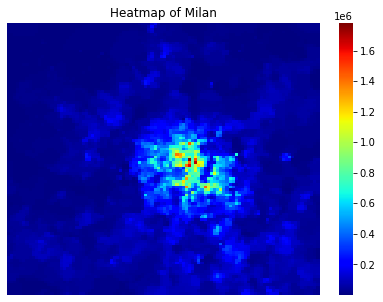

In [9]:
plt.figure(figsize=(7, 5))
sns.heatmap(pivot, cmap='jet')
plt.title('Heatmap of Milan')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('../plots/heatmap_milan.png')

### Getting Hotspots

In [10]:
max_traffic = final_telco.telecomunications.max()
mean_traffic = final_telco.telecomunications.mean()

#### Defining p

In [11]:
for p in np.linspace(0.5, 0.75, 26):
    hotspots = final_telco[final_telco.telecomunications >= \
                           mean_traffic + (max_traffic - mean_traffic) * p].square_id
    print(p, len(hotspots))

0.5 44
0.51 43
0.52 40
0.53 37
0.54 35
0.55 34
0.56 32
0.5700000000000001 28
0.58 26
0.59 22
0.6 20
0.61 18
0.62 18
0.63 18
0.64 16
0.65 15
0.66 14
0.67 14
0.6799999999999999 13
0.69 13
0.7 13
0.71 12
0.72 12
0.73 12
0.74 10
0.75 9


In [12]:
p = 0.6
hotspots = final_telco[final_telco.telecomunications >= \
                       mean_traffic + (max_traffic - mean_traffic) * p].square_id
hotspots

4458    4459
4854    4855
4855    4856
4856    4857
4954    4955
4955    4956
4960    4961
5058    5059
5060    5061
5158    5159
5160    5161
5161    5162
5255    5256
5257    5258
5258    5259
5261    5262
5757    5758
5856    5857
6057    6058
6063    6064
Name: square_id, dtype: int64

In [13]:
with open('hotspots_mi.pkl', 'wb') as file:
    pickle.dump(list(hotspots), file)

## Trento

In [14]:
columns = ['square_id',
           'time_interval',
           'country_code',
           'sms_in',
           'sms_out',
           'call_in',
           'call_out',
           'internet']
data = pd.read_csv('../data/telecommunications_tn/sms-call-internet-tn-2013-11-18.txt', 
                   sep='\t',
                   names=columns)
print(data.shape)
data.head()

(2281880, 8)


,square_id,time_interval,country_code,sms_in,sms_out,call_in,call_out,internet
0,10000,1384729200000,0,0.163344,NaN,NaN,NaN,NaN
1,10000,1384729200000,39,0.044128,0.011676,0.161402,0.345043,5.602861
2,10000,1384729800000,39,0.056155,0.044479,0.022240,0.021888,6.316324
3,10000,1384730400000,0,0.161402,NaN,NaN,NaN,NaN
4,10000,1384730400000,39,0.105444,0.022240,NaN,NaN,5.068438


In [15]:
sum_cols = ['sms_in', 'sms_out', 'call_in', 'call_out', 'internet']
group_data = data.groupby('square_id')[sum_cols].sum()
group_data['telecomunications'] = group_data[sum_cols].sum(axis=1)
group_data

,sms_in,sms_out,call_in,call_out,internet,telecomunications
square_id,,,,,,
38,193.642259,97.242078,91.782737,96.142322,2356.900031,2835.709427
39,193.390779,72.333866,82.533934,96.902901,2176.240944,2621.402424
40,231.779987,101.087580,90.798466,104.600251,2169.457080,2697.723364
154,343.774601,122.822815,130.878076,157.895673,2813.465361,3568.836526
155,296.979807,103.863445,116.921404,138.568334,3045.278261,3701.611251
...,...,...,...,...,...,...
11336,38.407793,27.530811,23.668579,25.927796,180.505072,296.040051
11337,56.764368,29.907785,42.057579,42.001106,399.520786,570.251624
11452,974.894509,701.399608,444.399053,432.914697,5341.605356,7895.213222


In [16]:
final_telco = group_data['telecomunications']
final_telco.head()

square_id
38     2835.709427
39     2621.402424
40     2697.723364
154    3568.836526
155    3701.611251
Name: telecomunications, dtype: float64

In [17]:
for day in range(19, 25):
    data = pd.read_csv(f'../data/telecommunications_tn/sms-call-internet-tn-2013-11-{day}.txt', 
                       sep='\t',
                       names=columns)
    group_data = data.groupby('square_id')[sum_cols].sum()
    group_data['telecomunications'] = group_data[sum_cols].sum(axis=1)
    final_telco += group_data['telecomunications']

In [18]:
final_telco = final_telco.reset_index()
final_telco.head()

,square_id,telecomunications
0,38,20960.797647
1,39,18682.118688
2,40,18648.993114
3,154,26183.283042
4,155,26762.132953


In [19]:
final_telco['square_x'] = (final_telco.square_id - 1) % 117
final_telco['square_y'] = (final_telco.square_id - 1) // 117
final_telco

,square_id,telecomunications,square_x,square_y
0,38,20960.797647,37,0
1,39,18682.118688,38,0
2,40,18648.993114,39,0
3,154,26183.283042,36,1
4,155,26762.132953,37,1
...,...,...,...,...
6254,11336,2472.671850,103,96
6255,11337,4387.753804,104,96
6256,11452,54799.096629,102,97
6257,11453,20511.380423,103,97


### Plotting Heatmap

In [20]:
pivot = pd.pivot_table(final_telco,
                       values='telecomunications', 
                       index='square_y', 
                       columns='square_x', 
                       aggfunc='sum')
pivot.head()

square_x,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
square_y,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
pivot = pivot.fillna(0)

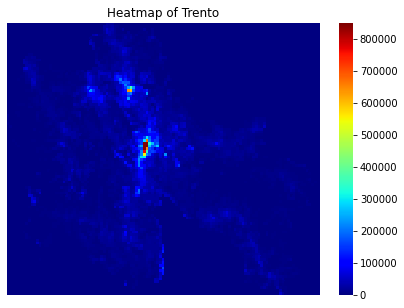

In [22]:
plt.figure(figsize=(7, 5))
sns.heatmap(pivot, cmap='jet', vmax=8.5e5)
plt.title('Heatmap of Trento')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('../plots/heatmap_trento.png')

### Getting Hotspots

In [23]:
max_traffic = final_telco.telecomunications.max()
mean_traffic = final_telco.telecomunications.mean()

#### Defining p

In [24]:
for p in np.linspace(0.1, 0.15, 6):
    hotspots = final_telco[final_telco.telecomunications >= \
                           mean_traffic + (max_traffic - mean_traffic) * p].square_id
    print(p, len(hotspots))

0.1 21
0.11 20
0.12 16
0.13 14
0.14 13
0.15 11


In [25]:
p = 0.11
hotspots = final_telco[final_telco.telecomunications >= \
                       mean_traffic + (max_traffic - mean_traffic) * p].square_id
hotspots

792     2738
851     2854
852     2855
2082    4850
2172    4966
2173    4967
2263    5083
2264    5084
2265    5085
2353    5200
2354    5201
2355    5202
2358    5205
2443    5317
2444    5318
2530    5434
2531    5435
2613    5551
2695    5667
2696    5668
Name: square_id, dtype: int64

In [26]:
with open('hotspots_tn.pkl', 'wb') as file:
    pickle.dump(list(hotspots), file)